In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\train.csv')

In [2]:
def cretate(data_f, the_f_list, feature_list, features_list):
    the_data = data_f
    l = len(the_f_list)
    for i in range(l):
        the_data = the_data[the_data[feature_list[i]] == the_f_list[i]]
    length = len(the_data)
    if(length == 0):
        ans_list = [[the_f_list, length, "N/A", "N/A"]]
    else:
        ans_list = [[the_f_list, length, len(the_data[the_data["Exited"] == 0])/length
                     , len(the_data[the_data["Exited"] == 1])/length]]        
    if(len(the_f_list) < len(feature_list)):
        for feature in features_list[l]:
            ans_list += cretate(data_f,the_f_list + [feature] , feature_list, features_list)
    return ans_list

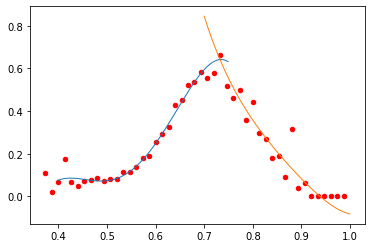

In [3]:
data_list = cretate(data, [], ["Age"], [list(range(28,76))])
data_list[0][0] = ["total"]
x = pd.DataFrame(data_list, columns = ["Catergories", "number", "ratio of not exit", "ratio of exit"])
x = x[x["number"] > 0]
x = x.iloc[1:48]
#這是原始的退出機率散佈圖(針對年齡)
plt.scatter(np.array(list(range(28,75)))/75,x["ratio of exit"],s=20, color = "red")
##二次回歸的準備
from scipy.optimize import curve_fit
def sigmoid(x, Beta_1, Beta_2, Beta_3, Beta_4, Beta_5):
    y = Beta_1 + Beta_2*x + Beta_3*x*x+ Beta_4*x*x*x + Beta_5*x*x*x*x
    return y
#這是28至55歲顧客的退出機率的二次回歸
x = np.array(data["Age"][data["Age"] <= 55])
y = np.array(data["Exited"][data["Age"] <= 55])
X = x/75
popt, pcov = curve_fit(sigmoid, X, y)
x = np.array(list(range(400,750)))/1000
plt.plot(x ,sigmoid(x, *popt) , linewidth=1, label='fit')
#這是55至75歲顧客的退出機率二次回歸
x2 = np.array(data["Age"][data["Age"] >= 55])
y2 = np.array(data["Exited"][data["Age"] >= 55])
X2 = x2/75
popt2, pcov2 = curve_fit(sigmoid, X2, y2)
x = np.array(list(range(700,1000)))/1000
plt.plot(x ,sigmoid(x, *popt2) , linewidth=1, label='fit')

In [4]:
del data["CustomerId"]
del data["Surname"]
del data["RowNumber"]
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
feature = ['Geography', 'Gender','NumOfProducts','Tenure']
data["Ages"] = result
data["CreditScore"] = data["CreditScore"]/1000
del data["Age"]
data["EstimatedSalary"] = data["EstimatedSalary"]/200000
data["Balance"] = data["Balance"]/200000
data = pd.get_dummies(data, columns = feature)
y = np.array(data["Exited"])
del data["Exited"]
data["ratio"] = data["Balance"]/data["EstimatedSalary"]
poly = PolynomialFeatures(degree=3)
X = np.array(data)
X = poly.fit_transform(X)
data

CreditScore   Balance  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0.720  0.570260          0               1         0.537886   
1           0.682  0.311987          1               0         0.565443   
2           0.672  0.599518          1               1         0.664626   
3           0.592  0.521289          1               0         0.554287   
4           0.753  0.601939          0               1         0.631893   
...           ...       ...        ...             ...              ...   
7995        0.568  0.605398          1               1         0.624452   
7996        0.602  0.729230          1               0         0.496380   
7997        0.679  0.664050          1               0         0.653904   
7998        0.715  0.593647          0               0         0.477423   
7999        0.600  0.311987          0               0         0.331575   

          Ages  Geography_France  Geography_Germany  Geography_Spain  \
0     0.075556                 0                  0                1   
1     0.632452                 1                  0                0   
2     0.083590                 1                  0                0   
3     0.096925                 0                  0                1   
4     0.140592                 0                  0                1   
...        ...               ...                ...              ...   
7995  0.075322                 1                  0                0   
7996  0.247736                 0                  1                0   
7997  0.171054                 0                  0                1   
7998  0.075556                 1                  0                0   
7999  0.140592                 1                  0                0   

      Gender_Female  ...  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  \
0                 0  ...                1                0                0   
1                 1  ...                0                0                0   
2                 1  ...                0                0                0   
3                 1  ...                0                0                0   
4                 0  ...                0                0                0   
...             ...  ...              ...              ...              ...   
7995              1  ...                1                0                0   
7996              1  ...                0                0                0   
7997              1  ...                0                0                0   
7998              0  ...                0                0                0   
7999              1  ...                0                0                0   

      Tenure_2  Tenure_3  Tenure_4  Tenure_5  Tenure_6  Tenure_7     ratio  
0            0         0         0         1         0         0  1.060186  
1            0         0         1         0         0         0  0.551757  
2            0         0         0         1         0         0  0.902039  
3            0         0         1         0         0         0  0.940469  
4            0         0         0         1         0         0  0.952596  
...        ...       ...       ...       ...       ...       ...       ...  
7995         0         0         0         0         1         0  0.969486  
7996         0         0         0         0         0         1  1.469097  
7997         0         0         0         1         0         0  1.015516  
7998         0         0         1         0         0         0  1.243442  
7999         0         0         0         1         0         0  0.940925  

[8000 rows x 22 columns]

In [5]:
classifiyer = MLPClassifier(solver='lbfgs', alpha=1e-5,
...                     hidden_layer_sizes=(200, 200, 200, 200), random_state=1, max_iter = 300)
classifiyer.fit(X,y)

c:\users\myful\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 200, 200, 200),
              max_iter=300, random_state=1, solver='lbfgs')

In [6]:
predict = classifiyer.predict(X)
answer = y + 0
test = (predict + answer - 1)**2
print(test.mean(),predict)
print(sum(predict * answer)/sum(predict))
print(sum(predict * answer)/sum(answer))
print(predict.mean())

0.97325 [0 1 0 ... 1 0 0]
0.9591968911917098
0.9074754901960784
0.193


In [7]:
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\test.csv')
del data["CustomerId"]
del data["Surname"]
del data["RowNumber"]
Age = np.array(data["Age"])
result1 = sigmoid(Age/75, *popt)
result1[Age > 55] = 0
result2 = sigmoid(Age/75, *popt2)
result2[Age <= 55] = 0
result = result2 + result1
feature = ['Geography', 'Gender','NumOfProducts','Tenure']
data["Ages"] = result
data["CreditScore"] = data["CreditScore"]/1000
del data["Age"]
data["EstimatedSalary"] = data["EstimatedSalary"]/200000
data["Balance"] = data["Balance"]/200000
data = pd.get_dummies(data, columns = feature)
data["ratio"] = data["Balance"]/data["EstimatedSalary"]
X = np.array(data)
poly = PolynomialFeatures(degree=3)
X = poly.fit_transform(X)
data

CreditScore   Balance  HasCrCard  IsActiveMember  EstimatedSalary  \
0           0.726  0.311987          0               0         0.530697   
1           0.661  0.651698          1               0         0.628882   
2           0.545  0.311987          1               1         0.391861   
3           0.731  0.433585          1               0         0.680131   
4           0.533  0.311987          1               1         0.676028   
...           ...       ...        ...             ...              ...   
1995        0.628  0.311987          1               1         0.481005   
1996        0.639  0.490772          1               0         0.547658   
1997        0.548  0.595392          1               1         0.583628   
1998        0.602  0.311987          1               1         0.640680   
1999        0.615  0.527852          1               0         0.520702   

          Ages  Geography_France  Geography_Germany  Geography_Spain  \
0     0.083623                 1                  0                0   
1     0.140592                 1                  0                0   
2     0.079586                 1                  0                0   
3     0.140592                 0                  0                1   
4     0.490264                 1                  0                0   
...        ...               ...                ...              ...   
1995  0.075322                 1                  0                0   
1996  0.115860                 0                  1                0   
1997  0.292659                 1                  0                0   
1998  0.206946                 0                  0                1   
1999  0.085627                 0                  1                0   

      Gender_Female  ...  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  \
0                 1  ...                0                0                0   
1                 0  ...                0                0                0   
2                 0  ...                1                0                0   
3                 1  ...                0                0                0   
4                 1  ...                0                0                0   
...             ...  ...              ...              ...              ...   
1995              0  ...                1                0                0   
1996              0  ...                1                0                0   
1997              1  ...                1                0                0   
1998              1  ...                1                0                0   
1999              1  ...                0                0                0   

      Tenure_2  Tenure_3  Tenure_4  Tenure_5  Tenure_6  Tenure_7     ratio  
0            0         1         0         0         0         0  0.587882  
1            0         1         0         0         0         0  1.036281  
2            0         0         0         0         1         0  0.796167  
3            0         1         0         0         0         0  0.637502  
4            0         0         0         0         1         0  0.461500  
...        ...       ...       ...       ...       ...       ...       ...  
1995         0         0         0         0         1         0  0.648614  
1996         0         0         0         1         0         0  0.896127  
1997         0         1         0         0         0         0  1.020156  
1998         0         0         0         0         0         1  0.486963  
1999         0         0         0         1         0         0  1.013732  

[2000 rows x 22 columns]

In [8]:
data = pd.read_csv('D:\\hw_data\\churn_prediction_data\\test.csv')
predict = classifiyer.predict(X)
print(predict.mean())
data["predict"] = predict
Exited = data["predict"]
RowNumber = data["RowNumber"]
upload = np.array([RowNumber,Exited])
upload = upload.transpose()
upload = list(upload)
upload
x = pd.DataFrame(upload, columns = ["RowNumber", "Exited"])
x.to_csv('second_try.csv')

0.1935
